# MachineLearnia Vidéo 5 - Premier Neurone 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. Dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


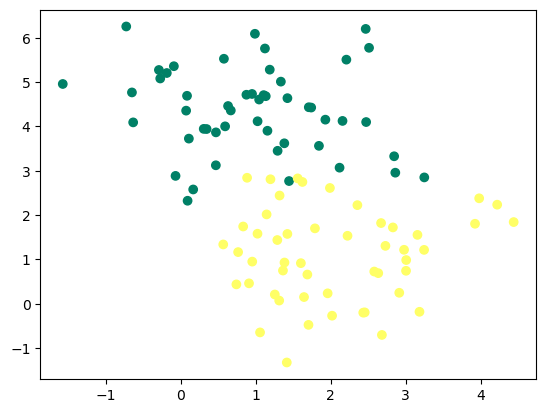

In [15]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

# 2. Fonctions du modele

In [16]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [17]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [18]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A+ epsilon))

In [19]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [20]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [21]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
from tqdm import tqdm

In [24]:

def artificial_neuron(x_train, y_train, x_test, y_test, learning_rate=0.1, n_iter=100):
    # Initialisation W, b
    W, b = initialisation(x_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc  = []

    # Boucle d'apprentissage
    for i in tqdm(range(n_iter)):
        A = model(x_train, W, b)

        if i % 10 == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(x_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))
          
            # Test
            A_test = model(x_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(x_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # Mise à jour
        dW, db = gradients(A, x_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)

    return W, b

In [25]:
W, b = artificial_neuron(x_train, y_train, x_test, y_test)

NameError: name 'x_train' is not defined

# 3. Frontiere de décision

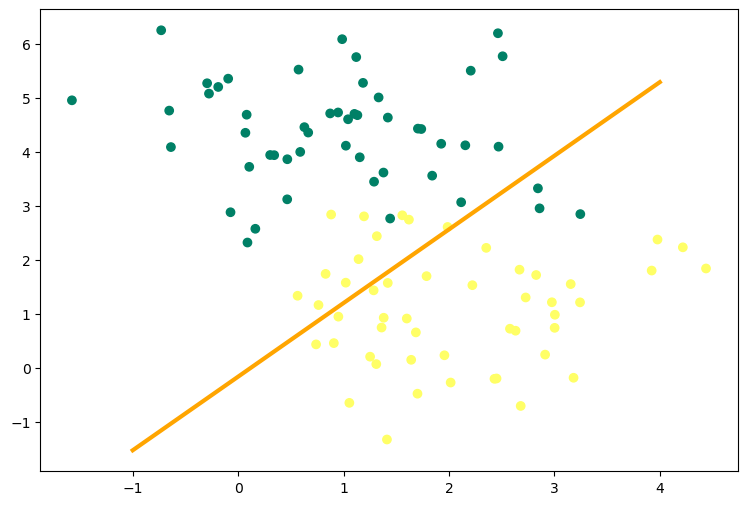

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)

# 4. Visualisations 3D

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [ ]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()


# Exercice - Cat vs Dog

In [ ]:
!pip install h5py # h5py vous permet d'ouvrir les fichiers au format hdf5. N'oubliez pas de l'installer !
from utilities import *

ERROR: Invalid requirement: '#'


In [27]:
x_train, y_train, x_test, y_test = load_data()

NameError: name 'load_data' is not defined

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [ ]:
print(x_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


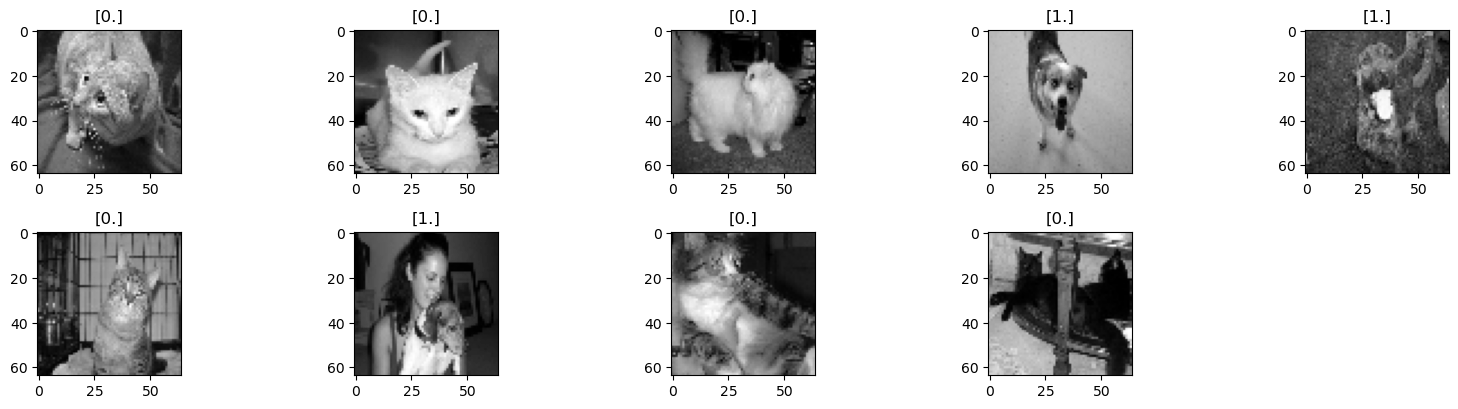

In [ ]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [ ]:
# TO DO 
# 1. Normaliser le train_set et le test_set (0-255 -> 0-1)
# 2. flatten() les variables du train_set et du test_set (64x64 -> 4096)
# 3. Entrainer le modele sur le train_set (tracer la courbe d'apprentissage, trouver les bons hyper-params)
# (si vous rencontrez un probleme avec le log_loss, utiliser la fonction de sklearn a la place !)
# 4. Évaluer le modele sur le test_set (tracer également la courbe de Loss pour le test_set)
# 5. Partager vos conclusions dans les commentaires !

In [ ]:
x_train_reshape.max()

1.0

In [ ]:
lim=10
h=100
W1=np.linspace(-lim,lim,h)
W2=np.linspace(-lim,lim,h)

W11,W22= np.meshgrid(W1,W2)

W_final=np.c_[W11.ravel(),W22.ravel()].T 
W_final.shape

(2, 10000)

In [ ]:
b=0
z=X.dot(W_final) + b
A=1/(1+np.exp(-z))


epsilon = 1e-15
L=1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A+ epsilon),axis=0).reshape(W11.shape)
L.shape

(100, 100)

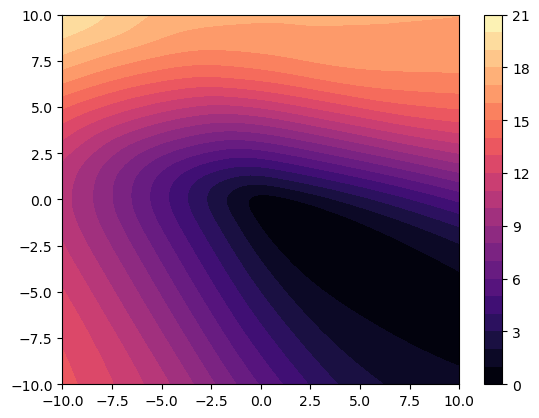

In [ ]:
plt.contourf(W11,W22,L,20,cmap='magma')
plt.colorbar()